In [1]:
from tiingo import TiingoClient
import os
from datetime import datetime, timedelta
import pandas as pd
import json
from pathlib import Path
%matplotlib inline

In [2]:
tiingo = os.getenv('TIINGO_API_KEY')

In [3]:
client = TiingoClient()

In [4]:
start = datetime.strptime('2019-12-01', '%Y-%m-%d')
end = datetime.now()

In [5]:
china_ticker_df = client.get_dataframe(['ASHR','CQQQ', 'CHIE', 'CHIM', 'KURE', 'CHIS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
china_ticker_df.head()

C:\Users\selva\Anaconda3\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


,ASHR,CQQQ,CHIE,CHIM,KURE,CHIS
date,,,,,,
2019-12-02 00:00:00+00:00,27.43,49.860,10.125,15.045,21.8970,21.2614
2019-12-03 00:00:00+00:00,27.42,49.510,10.000,14.895,21.8410,21.0850
2019-12-04 00:00:00+00:00,27.77,49.595,10.035,15.150,22.1499,21.4000
2019-12-05 00:00:00+00:00,27.89,50.440,9.865,15.120,22.4179,21.4622
2019-12-06 00:00:00+00:00,28.18,50.810,10.040,15.255,22.6872,21.6789


In [6]:
china_daily_returns = china_ticker_df.pct_change()
china_daily_returns.head()

,ASHR,CQQQ,CHIE,CHIM,KURE,CHIS
date,,,,,,
2019-12-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03 00:00:00+00:00,-0.000365,-0.007020,-0.012346,-0.009970,-0.002557,-0.008297
2019-12-04 00:00:00+00:00,0.012764,0.001717,0.003500,0.017120,0.014143,0.014940
2019-12-05 00:00:00+00:00,0.004321,0.017038,-0.016941,-0.001980,0.012099,0.002907
2019-12-06 00:00:00+00:00,0.010398,0.007335,0.017739,0.008929,0.012013,0.010097


In [7]:
us_ticker_df = client.get_dataframe(['SPY','IECS', 'IYH', 'IGM', 'IYE', 'IYH'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
us_ticker_df.head()

,SPY,IECS,IYH,IGM,IYE,IYH
date,,,,,,
2019-12-02 00:00:00+00:00,311.64,28.0742,208.62,231.49,31.47,208.62
2019-12-03 00:00:00+00:00,309.55,28.0321,208.12,230.06,31.01,208.12
2019-12-04 00:00:00+00:00,311.46,28.2070,210.04,230.86,31.52,210.04
2019-12-05 00:00:00+00:00,312.02,28.1710,209.90,231.28,31.33,209.90
2019-12-06 00:00:00+00:00,314.87,28.2770,211.22,233.38,31.98,211.22


In [8]:
us_daily_returns = us_ticker_df.pct_change()
us_daily_returns.head()

,SPY,IECS,IYH,IGM,IYE,IYH
date,,,,,,
2019-12-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03 00:00:00+00:00,-0.006706,-0.001500,-0.002397,-0.006177,-0.014617,-0.002397
2019-12-04 00:00:00+00:00,0.006170,0.006239,0.009225,0.003477,0.016446,0.009225
2019-12-05 00:00:00+00:00,0.001798,-0.001276,-0.000667,0.001819,-0.006028,-0.000667
2019-12-06 00:00:00+00:00,0.009134,0.003763,0.006289,0.009080,0.020747,0.006289


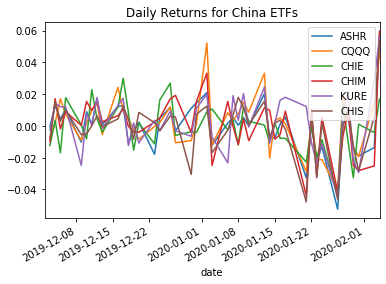

In [9]:
china_daily_returns.plot(title="Daily Returns for China ETFs")

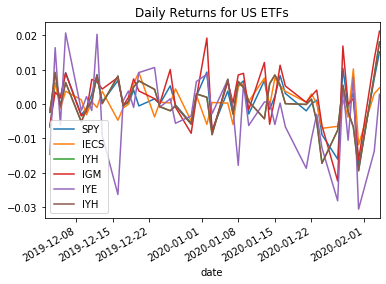

In [10]:
us_daily_returns.plot(title="Daily Returns for US ETFs")

In [11]:
china_std = china_daily_returns.std()
china_std

ASHR    0.016781
CQQQ    0.017751
CHIE    0.014737
CHIM    0.019075
KURE    0.018232
CHIS    0.017398
dtype: float64

In [12]:
us_std = us_daily_returns.std()
us_std

SPY     0.006522
IECS    0.004750
IYH     0.006920
IGM     0.008414
IYE     0.011498
IYH     0.006920
dtype: float64

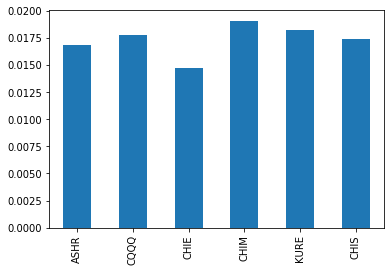

In [13]:
china_std.plot.bar()

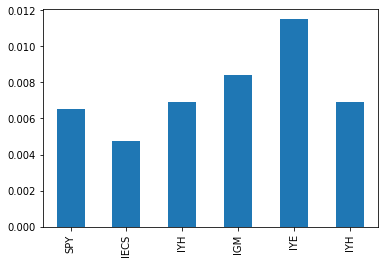

In [14]:
us_std.plot.bar()

In [15]:
#code to read csv of coronoavirus_cases
cv_csv = Path("coronavirus_cases.csv")
df_cv = pd.read_csv(cv_csv)
df_cv.set_index(pd.to_datetime(df_cv['Date'], infer_datetime_format=True), inplace=True)
df_cv.drop(columns=['Date'], inplace=True)
df_cv.sort_index(ascending=True, inplace=True)
df_cv.head()

,Deaths,Confirmed_Infected,Unnamed: 3
Date,,,
2020-01-21,NaN,331,NaN
2020-01-22,NaN,555,NaN
2020-01-23,NaN,654,NaN
2020-01-24,24.0,941,NaN
2020-01-25,52.0,2014,NaN


In [16]:
df_cv.dtypes

Deaths                float64
Confirmed_Infected      int64
Unnamed: 3            float64
dtype: object

In [17]:
df_cv.drop(columns='Unnamed: 3', inplace=True)

In [18]:
df_cv['Death/Infection'] = df_cv.Deaths / df_cv.Confirmed_Infected
df_cv.head()

,Deaths,Confirmed_Infected,Death/Infection
Date,,,
2020-01-21,NaN,331,NaN
2020-01-22,NaN,555,NaN
2020-01-23,NaN,654,NaN
2020-01-24,24.0,941,0.025505
2020-01-25,52.0,2014,0.025819


In [19]:
cv_change_df = df_cv.pct_change()
cv_change_df.head()

,Deaths,Confirmed_Infected,Death/Infection
Date,,,
2020-01-21,NaN,NaN,NaN
2020-01-22,NaN,0.676737,NaN
2020-01-23,NaN,0.178378,NaN
2020-01-24,NaN,0.438838,NaN
2020-01-25,1.166667,1.140276,0.01233


In [20]:
cv_change_df.index = cv_change_df.index.tz_localize('UTC')

In [21]:
combined_df = pd.concat([us_daily_returns, china_daily_returns, cv_change_df], axis=1, sort=True)
combined_df.head()

,SPY,IECS,IYH,IGM,IYE,IYH,ASHR,CQQQ,CHIE,CHIM,KURE,CHIS,Deaths,Confirmed_Infected,Death/Infection
2019-12-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03 00:00:00+00:00,-0.006706,-0.001500,-0.002397,-0.006177,-0.014617,-0.002397,-0.000365,-0.007020,-0.012346,-0.009970,-0.002557,-0.008297,NaN,NaN,NaN
2019-12-04 00:00:00+00:00,0.006170,0.006239,0.009225,0.003477,0.016446,0.009225,0.012764,0.001717,0.003500,0.017120,0.014143,0.014940,NaN,NaN,NaN
2019-12-05 00:00:00+00:00,0.001798,-0.001276,-0.000667,0.001819,-0.006028,-0.000667,0.004321,0.017038,-0.016941,-0.001980,0.012099,0.002907,NaN,NaN,NaN
2019-12-06 00:00:00+00:00,0.009134,0.003763,0.006289,0.009080,0.020747,0.006289,0.010398,0.007335,0.017739,0.008929,0.012013,0.010097,NaN,NaN,NaN
